In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from category_encoders import MEstimateEncoder
from sklearn.preprocessing import MinMaxScaler
import regression as reg
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('data/cleaned_cars.csv')
df = pd.get_dummies(df, columns = ['country'], drop_first=True, dtype=np.int8)
df.head()

,engine_capacity,cylinder,horse_power,top_speed,seats,brand,price,year,country_egypt,country_ksa,country_kuwait,country_oman,country_qatar,country_uae
0,2.0,4,180,205.0,8,peugeot,37955.250,2021,0,1,0,0,0,0
1,1.5,4,102,145.0,4,suzuki,26671.950,2021,0,1,0,0,0,0
2,2.3,4,420,173.0,4,ford,53460.000,2021,0,1,0,0,0,0
3,1.8,4,140,190.0,5,honda,28179.975,2021,0,1,0,0,0,0
4,1.8,4,140,190.0,5,honda,25740.450,2021,0,1,0,0,0,0


## Target encoding

In [3]:
X = df.copy()
y = X.pop('price')

X_encode = X.sample(frac=0.2, random_state=42)
y_encode = y[X_encode.index]
X = X.drop(X_encode.index)
y = y[X.index]

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["brand"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X = encoder.transform(X)
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)  

In [4]:
X.head()

,engine_capacity,cylinder,horse_power,top_speed,seats,brand,year,country_egypt,country_ksa,country_kuwait,country_oman,country_qatar,country_uae
0,2.0,4,180,205.0,8,32078.069442,2021,0,1,0,0,0,0
1,1.5,4,102,145.0,4,28438.222866,2021,0,1,0,0,0,0
2,2.3,4,420,173.0,4,43785.523914,2021,0,1,0,0,0,0
3,1.8,4,140,190.0,5,33980.315600,2021,0,1,0,0,0,0
4,1.8,4,140,190.0,5,33980.315600,2021,0,1,0,0,0,0


In [5]:
y.head()

0    37955.250
1    26671.950
2    53460.000
3    28179.975
4    25740.450
Name: price, dtype: float64

In [6]:
# Split the dataset into training (60%) and temporary (40%) sets with a fixed random_state
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary set into validation (50% of temporary, i.e., 20% of total) and test (50% of temporary, i.e., 20% of total) sets with the same random_state
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [7]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [8]:
# Print the sizes of the resulting datasets
print(f"Training set size: {(X_train_scaled.shape[0])}")
print(f"Validation set size: {(X_val_scaled.shape[0])}")
print(f"Test set size: {(X_test_scaled.shape[0])}")

# Optionally, print the datasets
print("\nTraining Set:")
X_train_scaled
df_ok = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_ok.head()    

Training set size: 2935
Validation set size: 979
Test set size: 979

Training Set:


,engine_capacity,cylinder,horse_power,top_speed,seats,brand,year,country_egypt,country_ksa,country_kuwait,country_oman,country_qatar,country_uae
0,0.275,0.3125,0.016650,0.456366,0.1875,0.054810,0.928571,0.0,0.0,0.0,0.0,1.0,0.0
1,0.250,0.3125,0.029288,0.656652,0.1875,0.225332,0.928571,0.0,0.0,0.0,0.0,0.0,1.0
2,0.250,0.2500,0.031896,0.570815,0.1875,0.097633,0.928571,0.0,0.0,1.0,0.0,0.0,0.0
3,0.175,0.2500,0.007021,0.490701,0.1250,0.023318,0.928571,0.0,0.0,0.0,0.0,1.0,0.0
4,0.375,0.3750,0.057172,0.688126,0.1875,0.283739,0.928571,0.0,0.0,0.0,0.0,0.0,0.0


## No API part

In [9]:
w = reg.linear_regression_fit(X_train_scaled, y_train)
y_predict = reg.linear_regression_predict(X_test, w)


In [10]:
# Calculate mean squared error
mse = mean_squared_error(y_predict, y_test)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.1068493947655963e+20


In [11]:
num_iterations = 1000
w, errors = reg.gradient_descent(X_train_scaled, y_train, 0.01, num_iterations)
print(w.shape)
y_predict = reg.linear_regression_predict(X_test_scaled, w)
mean_squared_error(y_predict, y_test)

Iteration 0: Error = 18993765125.540028
Iteration 100: Error = 17104594799.834753
Iteration 200: Error = 15842983401.179195
Iteration 300: Error = 14997917401.890114
Iteration 400: Error = 14429354409.475359
Iteration 500: Error = 14044352940.654978
Iteration 600: Error = 13781230640.555326
Iteration 700: Error = 13599050682.190886
Iteration 800: Error = 13470644280.919102
Iteration 900: Error = 13377979996.81015
(14,)


np.float64(8204837084.039645)

/tmp/ipykernel_31723/2113387963.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


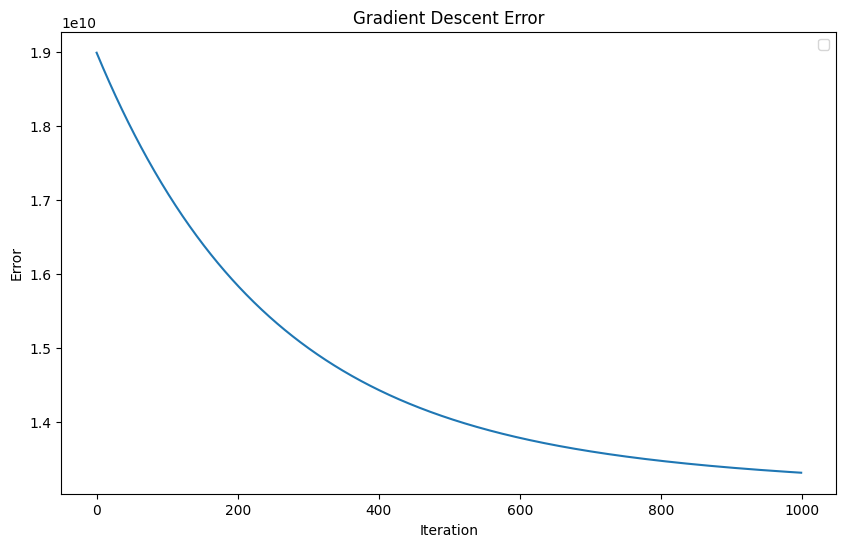

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Gradient Descent Error')
plt.legend()
plt.show()